<a href="https://colab.research.google.com/github/KandarpChaudhary/Wind_Mill_Power_Prediction/blob/main/AML_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name : Kandarp Chaudhary &amp; Sahil Gupta
## Roll no. : D21016 &amp; D21030

HYPOTHESIS TESTING PROCEDURE

1. Start with a well-developed, clear research problem or question

2. Establish hypotheses, both null and alternative

3. Determine appropriate statistical test and sampling distribution

4. Choose the Type I error rate

5. State the decision rule

6. Gather sample data

7. Calculate test statistics

8. State statistical conclusion

9. Make decision or inference based on conclusion

### Problem Statement:

<div style="text-align: justify">It is the year 2021 and we are at the verge of a massive climatic change. With global warming at its peak and fossil fuels inching towards its extinction, it is the need of the hour to step up and take responsibility for our planet. Developing countries all over the world are making a shift towards a cleaner energy source and are looking at ways to expand their global energy source power.</div>

<div style="text-align: justify">Switching to renewable energy sources is a great way to reduce dependency on imported fuels and increase cost efficiency. It is time we move towards a low-carbon future by embracing solar, hydro, geothermal energy and so on, to protect mother nature.</div>

<div style="text-align: justify">An efficient energy source that has been gaining popularity around the world is wind turbines. Wind turbines generate power by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, and so on influence the amount of power generated.</div>

https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/

### Objective:

<div style="text-align: justify">The objective is to build a sophisticated Machine Learning model that predicts the power that is generated (in KW/h) based on the various features provided in the dataset. To analyze and implement multiple algorithms and determine which is more appropriate for a problem To get hands-on experience in Machine Learning problems.</div>

### Problem solving approach:

# Train-test split!

1. <div style="text-align: justify">Questioning the data - Understanding the variables very carefully and formulating
questions/hypothesis. (Note : These are just initial hypothesis which may or may not seem to be
true after the EDA step.)</div>
2. <div style="text-align: justify">EDA - Exploring the dataset very carefully by doing univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Reporting the surprising elements (i.e. the one which were believed would be true in step 1 did not turn out to be true, or a result that was beyond expectation, etc.)</div>
3. <div style="text-align: justify">Feature engineering - (A) Suggesting some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons.</div>
4. <div style="text-align: justify">Feature engineering - (B) Suggesting some new feature generation techniques (e.g.: creating
dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature).</div>
5. <div style="text-align: justify">Initial model fitting step - Fitting a couple of linear regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets.
Reporting k-fold cross-validation MAE, RMSE, R-squared and adjusted R-squared values.</div>
6. <div style="text-align: justify">Advanced model fitting step - Using model selection methods (like forward selection or
backward elimination methods) to select an appropriate model.</div>
7. <div style="text-align: justify">Final model fitting step - Experiment and check if a decision tree model or KNN can be used to fit the data more accurately. Use any kind of hyperparameter tuning to fit the model. Experiment using all the feature sets created before (including all the transformed sets and new feature-generated sets).</div>
8. <div style="text-align: justify">Model testing - Consider the best competing models and test their performances on the test
data. Reporting the results.</div>

### Attribute Information :

|Column Name                       |Meaning|
|:---------------------------------|:------|
|tracking_id                       |ID of the Wind Turbine|
|datetime                          |Date and Time|
|wind_speed(m/s)                   |Speed of wind in m/s|
|atmospheric_temperature(°C)       |Atmospheric temperature in degree Celcius|
|shaft_temperature(°C)             |Wind Mill shaft temperature in degree Celcius |
|blades_angle(°)                   |Angle of blades in degree|
|gearbox_temperature(°C)           |Gear box temperature in degree Celcius|
|engine_temperature(°C)            |Engine temperature in degree Celcius|
|motor_torque(N-m)                 |Torque of Motor in N.m |
|generator_temperature(°C)         |Generator temperature in degree Celcius|
|atmospheric_pressure(Pascal)      |Atmospheric Pressure in Pascal|
|area_temperature(°C)              |Area temperature in degree Celcius|
|windmill_body_temperature(°C)     |Wind Mill body temperature in degree Celcius|
|wind_direction(°)                 |Wind direction in degree|
|resistance(ohm)                   |Winding resistance in Ohm|
|rotor_torque(N-m)                 |Rotor torque in N.m|
|turbine_status                    |Turbine Status(AAA, A2, AB, AC, A, ABC, BBB, BA, BB, B2, BCB, BD, B, D)|
|cloud_level                       |Cloud Level (Extremely Low, Low, Medium)|
|blade_length(m)                   |Length of blades in m|
|blade_breadth(m)                  |Bredth of blades in m|
|windmill_height(m)                |Height of Wind mill in m|
|windmill_generated_power(kW/h)    |Power generated by wind mill in kW/h|

In [24]:
import tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [25]:
url = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Wind_Mill_Power_Prediction.csv"
df = pd.read_csv(url)
df.shape

(28200, 22)

In [26]:
df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [27]:
np.shape(df.tracking_id.unique())[0], np.shape(df.datetime.unique())[0]

(28200, 28200)

In [28]:
#creating seperate dataframe without tracking_id and datetime columns.
df1 = df.drop(columns = ["tracking_id", "datetime"])
df1.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [29]:
#identifying Null values in each columns
df1.isnull().sum()

wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [30]:
#removing rows having Null values in target variable column i.e. windmill_generated_power(kW_h)
df1.dropna(subset=["windmill_generated_power(kW/h)"])

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934
28196,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195
28197,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,D,Medium,NaN,0.380264,28.533850,11.096599
28198,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239


In [31]:
df1.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
wind_speed(m/s),1.000000,0.052363,0.038500,-0.003593,0.016240,0.154659,0.377897,0.427604,-0.121641,0.198772,0.028000,0.045681,0.236767,0.152735,0.006996,0.003903,-0.011933,0.062754
atmospheric_temperature(°C),0.052363,1.000000,0.011944,0.007429,0.005955,0.050748,0.095394,0.117335,-0.023382,0.073553,0.008472,0.018082,0.061556,0.044131,0.000567,0.003729,0.001270,-0.001005
shaft_temperature(°C),0.038500,0.011944,1.000000,-0.009692,0.029967,0.204034,0.071366,0.074695,-0.018744,0.087570,0.018121,0.020066,0.032219,0.027989,0.000145,-0.006120,-0.008823,0.046552
blades_angle(°),-0.003593,0.007429,-0.009692,1.000000,-0.025215,-0.064848,-0.138646,-0.044344,0.009316,-0.076014,0.003258,-0.027141,-0.033415,-0.048541,-0.009242,-0.061279,0.002717,-0.154808
gearbox_temperature(°C),0.016240,0.005955,0.029967,-0.025215,1.000000,0.132756,0.045057,0.045125,-0.008589,0.058875,0.017249,0.029088,0.021098,0.016662,-0.002677,0.011283,0.003853,0.053192
engine_temperature(°C),0.154659,0.050748,0.204034,-0.064848,0.132756,1.000000,0.352509,0.360616,-0.061328,0.342259,0.089745,0.137448,0.208365,0.138721,-0.007294,0.011560,-0.011952,0.272597
motor_torque(N-m),0.377897,0.095394,0.071366,-0.138646,0.045057,0.352509,1.000000,0.934950,-0.215039,0.475887,0.028134,0.212269,0.513372,0.390499,0.005023,0.052973,0.001177,0.505553
generator_temperature(°C),0.427604,0.117335,0.074695,-0.044344,0.045125,0.360616,0.934950,1.000000,-0.238989,0.517243,0.036341,0.212498,0.539554,0.371918,0.005362,0.017573,-0.000638,0.391820
atmospheric_pressure(Pascal),-0.121641,-0.023382,-0.018744,0.009316,-0.008589,-0.061328,-0.215039,-0.238989,1.000000,-0.091428,-0.009015,-0.028435,-0.128475,-0.093835,0.005462,0.005022,0.002784,-0.013310
area_temperature(°C),0.198772,0.073553,0.087570,-0.076014,0.058875,0.342259,0.475887,0.517243,-0.091428,1.000000,0.050754,0.200037,0.266673,0.187335,0.000074,0.022397,-0.005301,0.384564


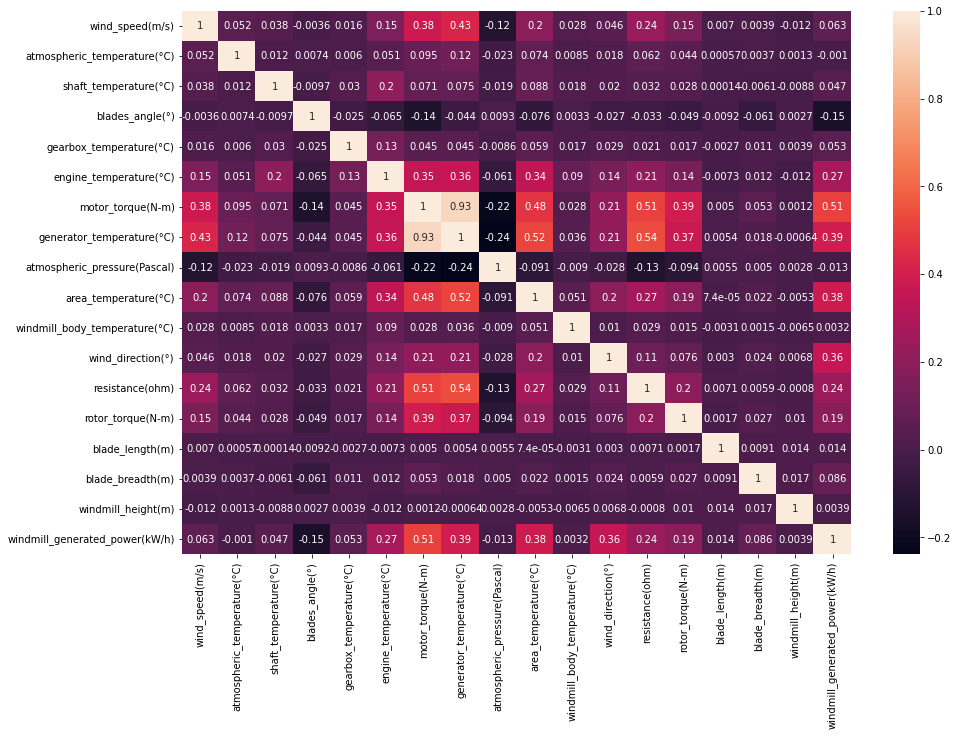

In [32]:
Var_Corr = df1.corr()
# plot the heatmap and annotation on it
#px.imshow(df1.corr(), width=1000, height=700)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
fig = plt.gcf()
fig.set_size_inches(15,10)

In [33]:
#Missing Value imputation

In [34]:
df_cat = df1[["turbine_status","cloud_level"]]
df_cont = df1.drop(columns = ["turbine_status","cloud_level"])

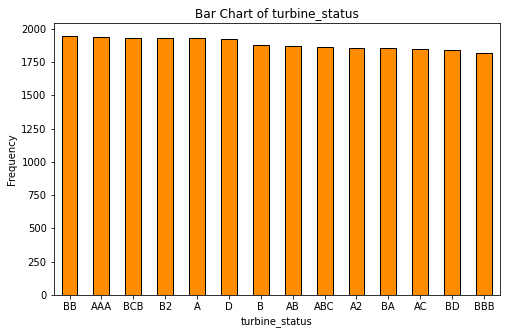

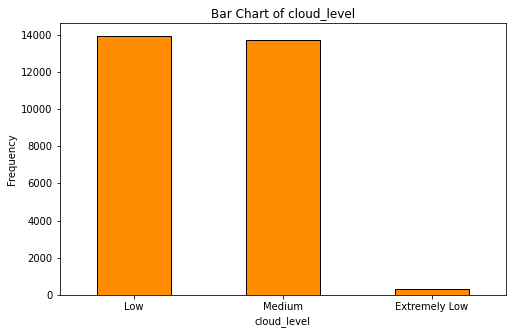

In [35]:
for i in range(len(df_cat.columns)):
    plt.figure(figsize=(8,5))                           #defining the figure size
    df_cat.iloc[:,i].value_counts().plot(kind='bar', edgecolor='black', color='DarkOrange') #creating the bar chart
    plt.xticks(rotation = 0)                            #making X-axis labels horizontal
    plt.title("Bar Chart of "+df_cat.columns[i])        #assigning histogram title
    plt.xlabel(df_cat.columns[i])                       #assigning X-axis label
    plt.ylabel("Frequency")                             #assigning Y-axis label
    plt.show()

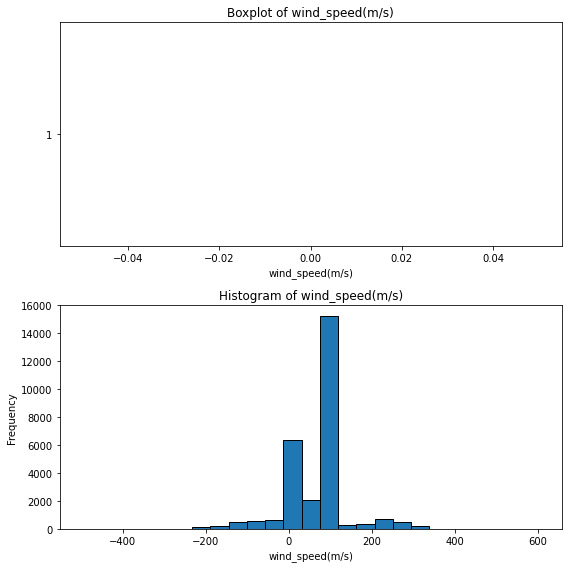

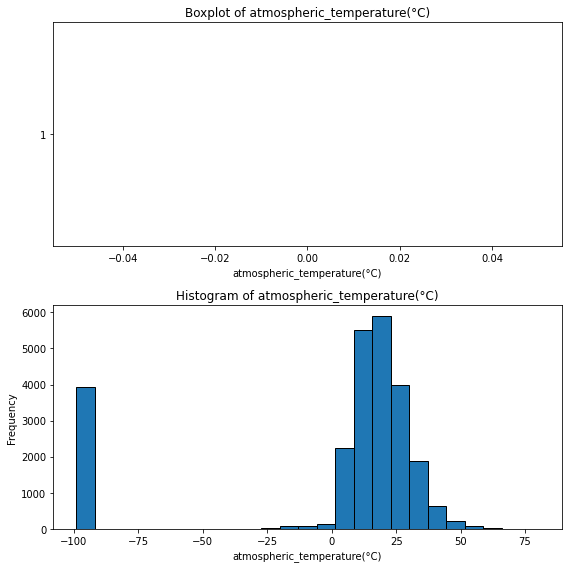

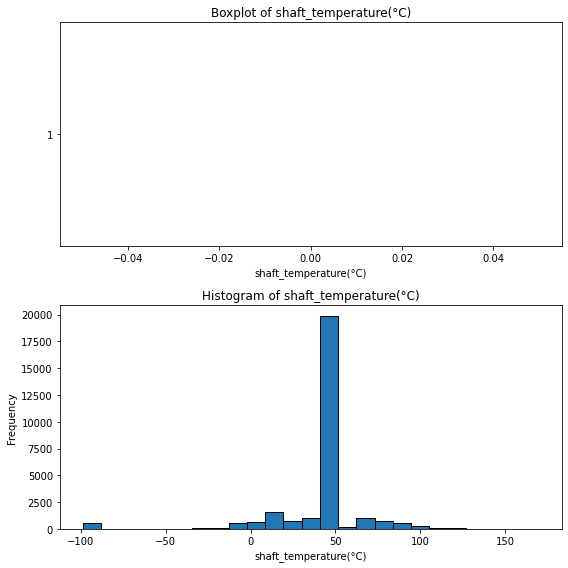

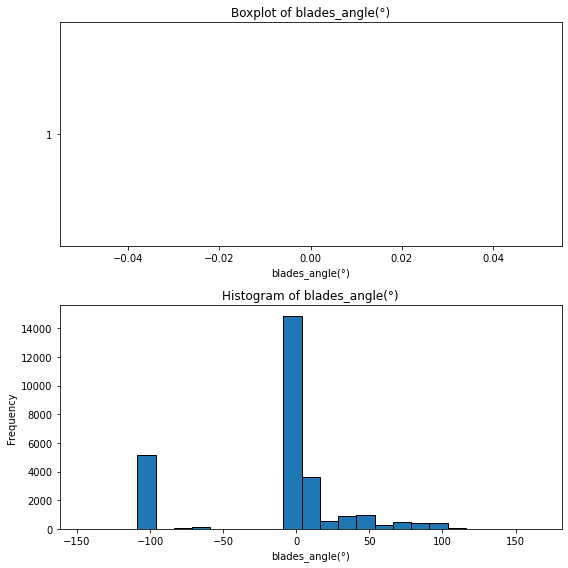

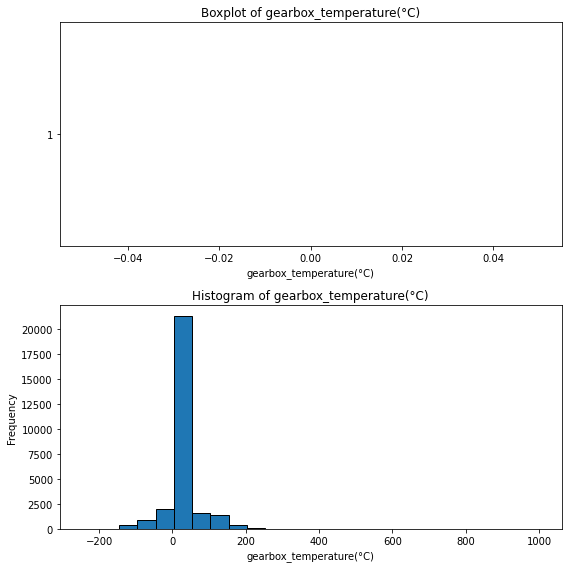

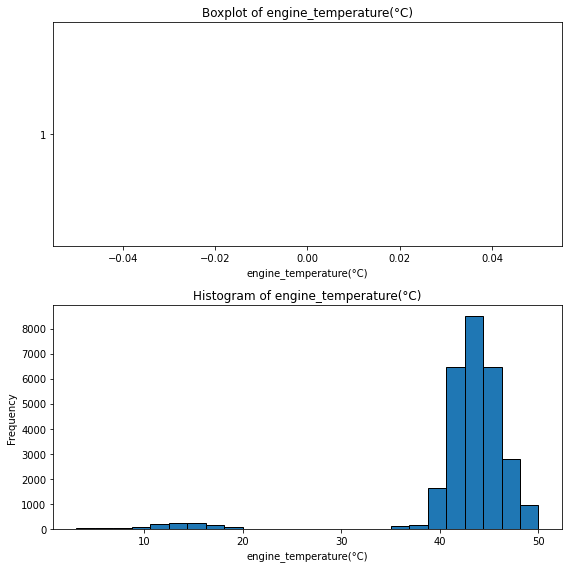

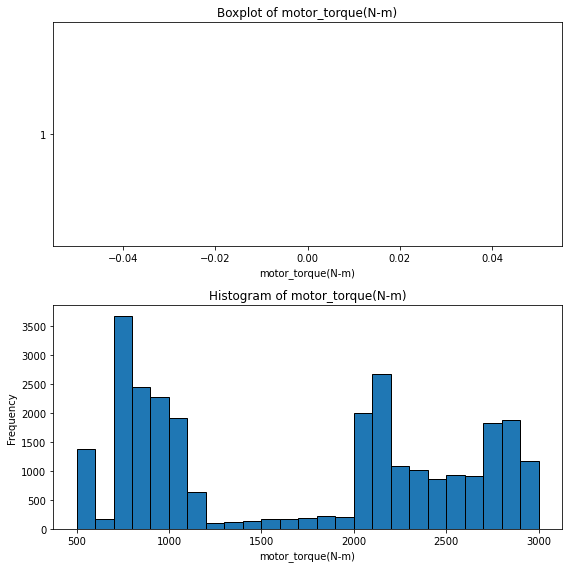

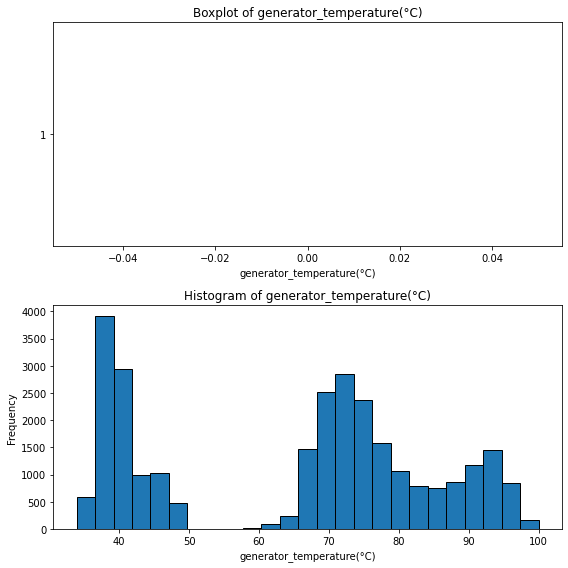

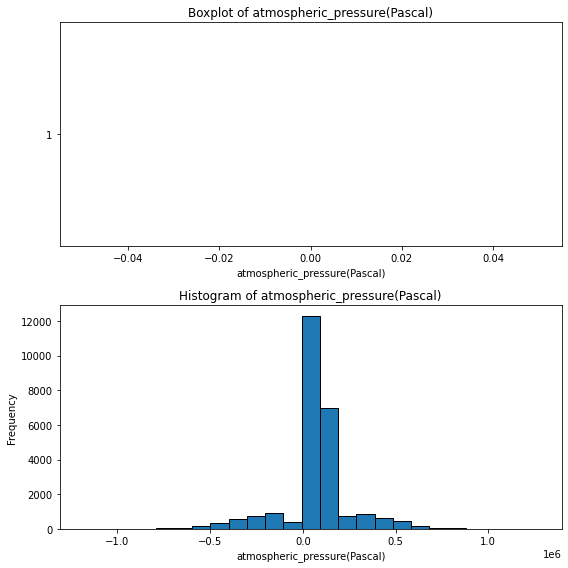

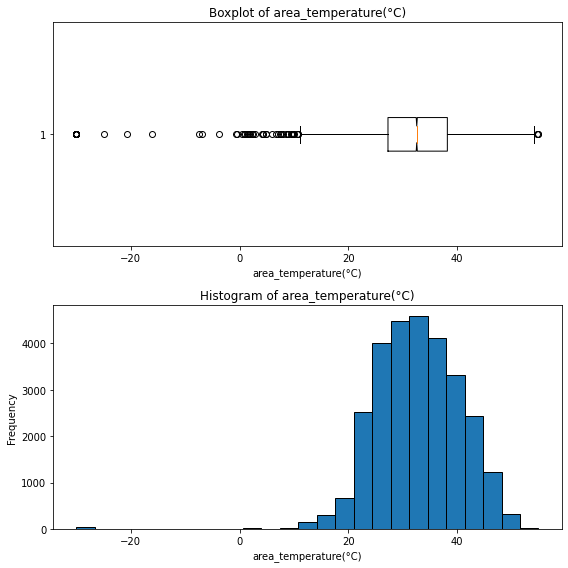

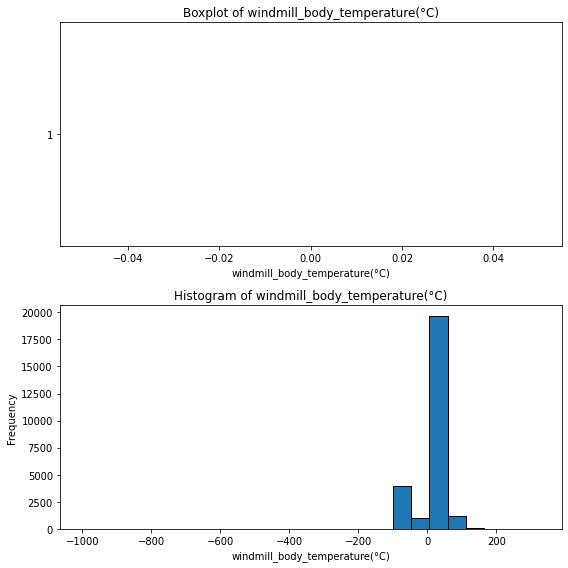

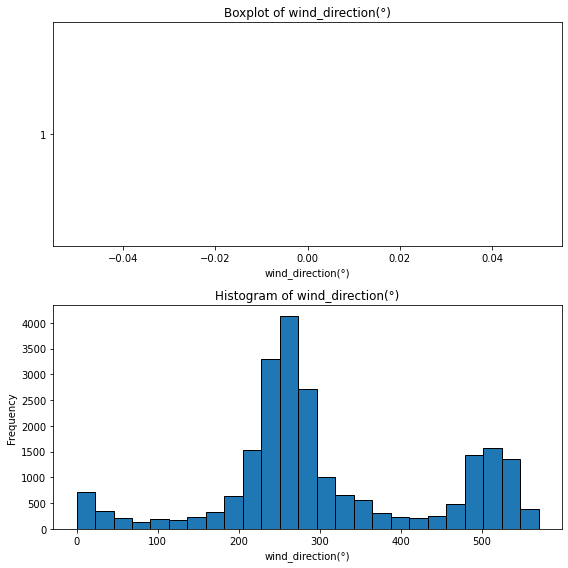

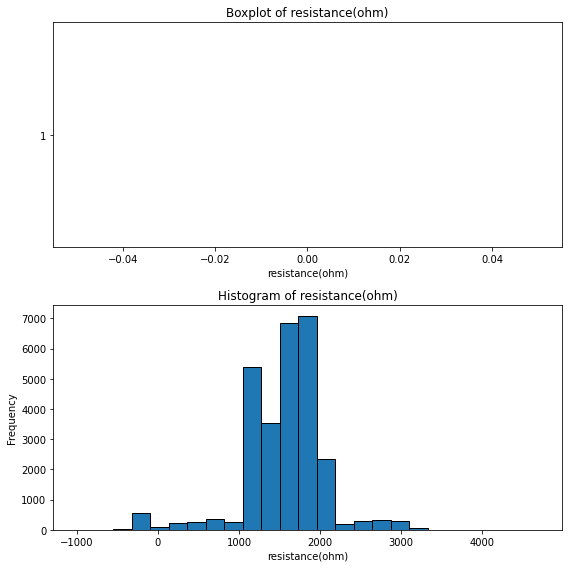

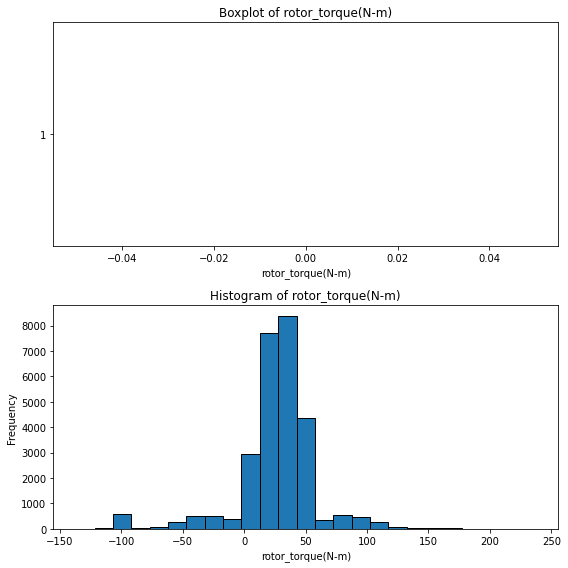

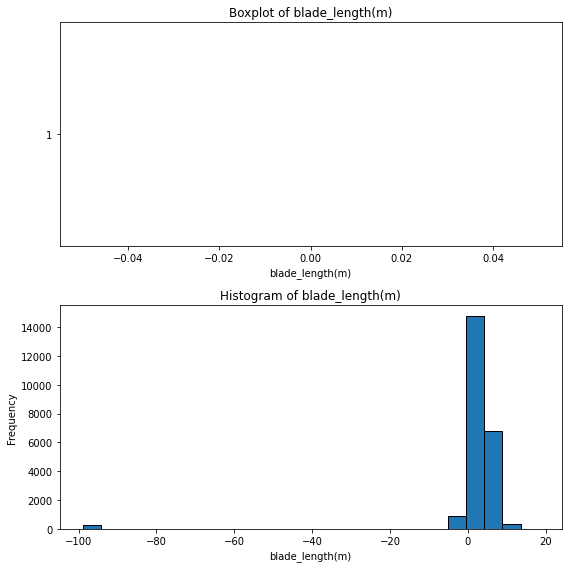

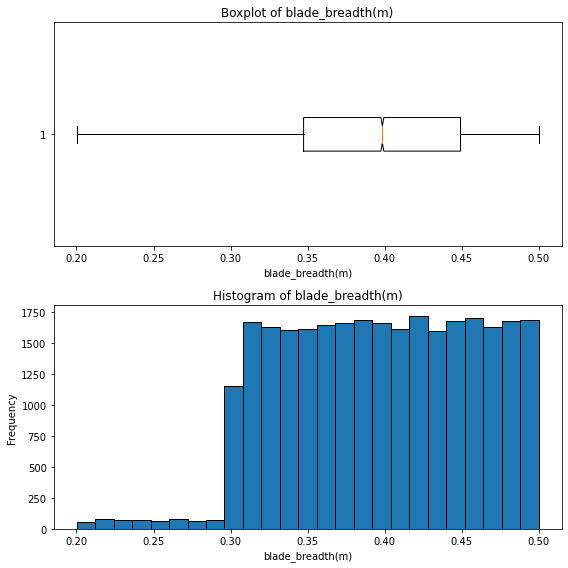

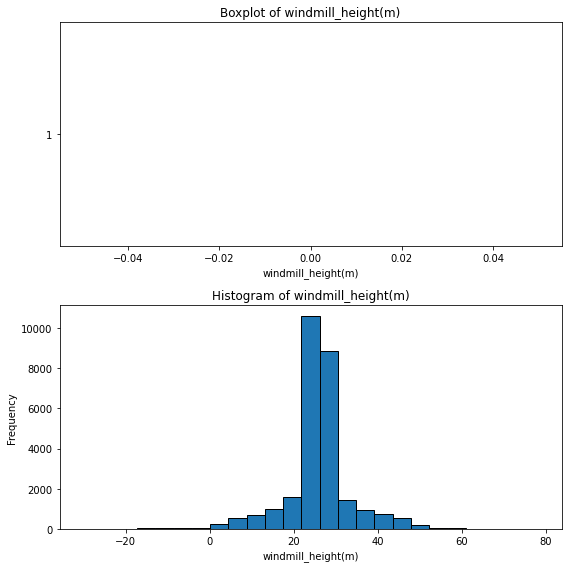

In [36]:
for i in range(len(df_cont.columns)-1):
    fig = plt.figure(figsize=(8,8),tight_layout = 1)    #plotting a figure
    fig1 = fig.add_subplot(2,1,1)                       #creating subplots to include boxplot and histogram in one image
    plt.boxplot(df_cont.iloc[:,i],vert=0,notch = 1)     #creating the boxplot
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.title('Boxplot of %s'%df_cont.columns[i])       #assigning box plot title
    fig2 = fig.add_subplot(2,1,2)                       #creating subplots to include boxplot and histogram in one image
    plt.hist(df_cont.iloc[:,i],edgecolor = "black", bins = 25) #creating the histogram
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.ylabel('Frequency')                             #assigning Y-axis label
    plt.title('Histogram of %s'%df_cont.columns[i])     #assigning histogram title
    plt.show()